# CHAPTER 12  
***  
## Crawling Through APIs  
***    



## A Brief Introduction to APIs  
***   
 API defines a standardized syntax that allows one piece of software to com‐ municate with another piece of software  
 - This section focuses on web APIs   
 - Java program to communicate with a Python program running on the same machine  
 - ESPN provides APIs for athlete information, game scores,  
 - Google has dozens of APIs in its Developers section for language translations, analytics, and geolocation.  
 https://console.developers.google.com/?pli=1  
 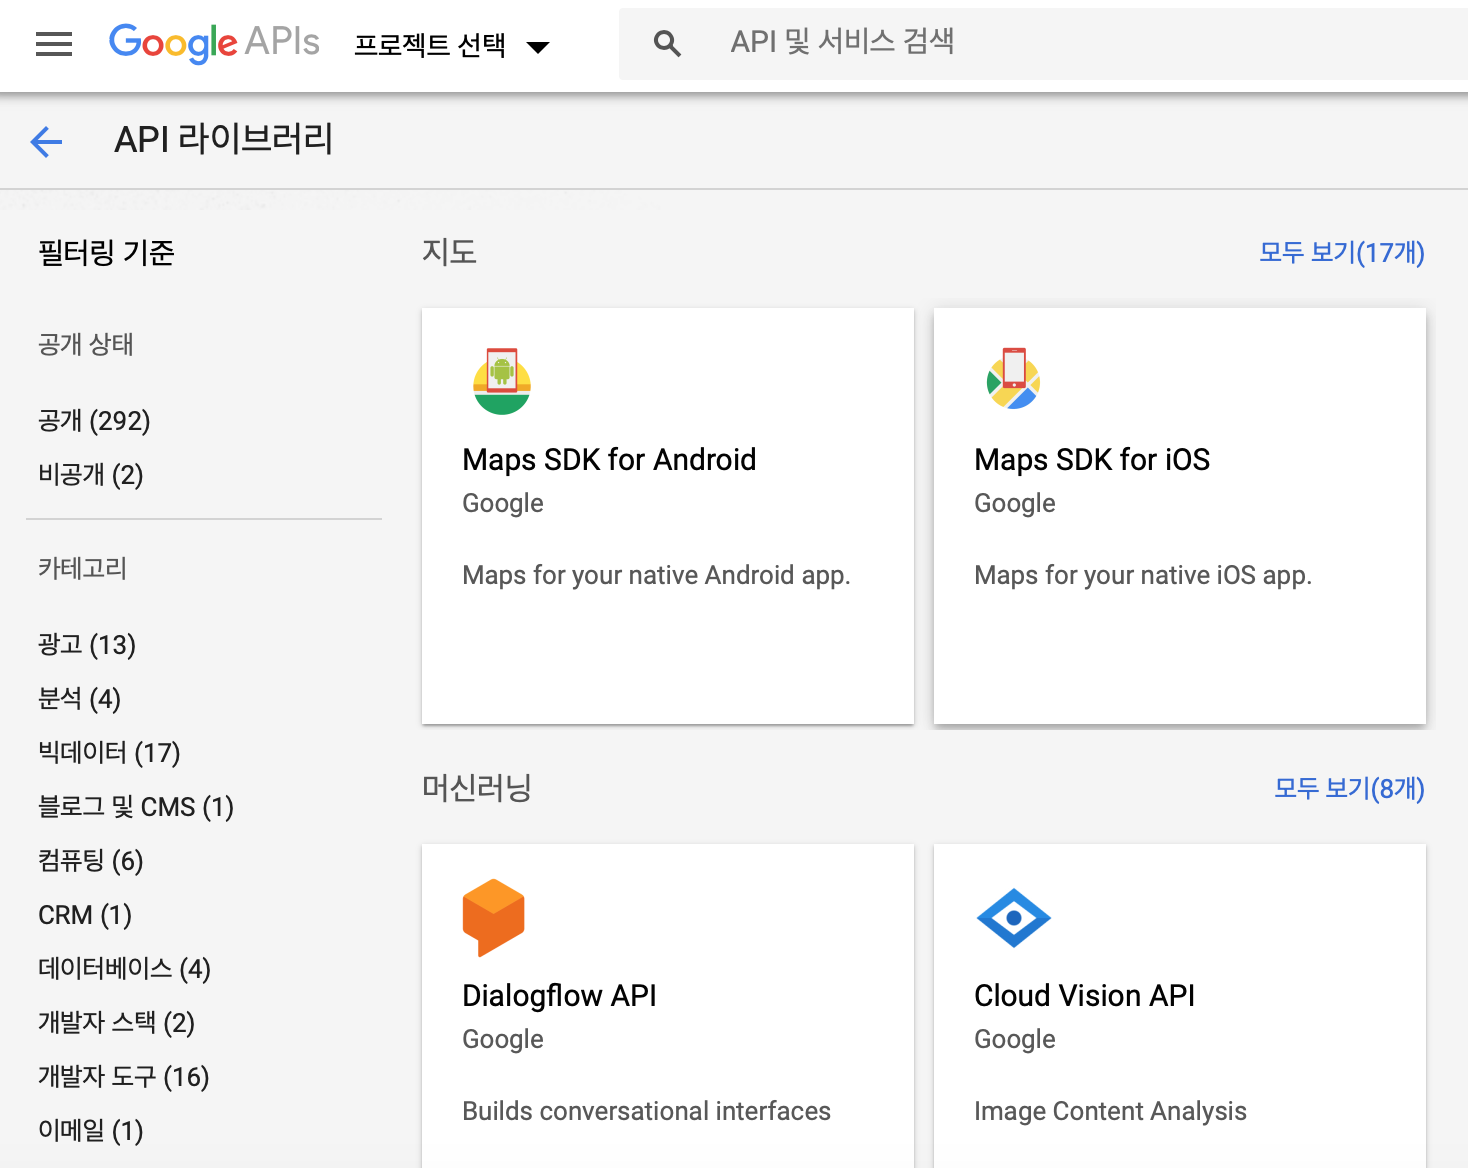

The response from the API is usually returned in a JSON or XML format.   
### JSON-formatted API response:  
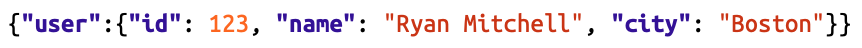

### XML-formatted API response:  
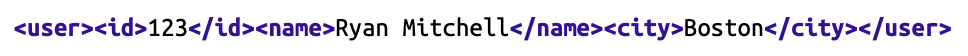

## HTTP Methods and APIs  
***  
four main ways (or methods) to request information from a web server via HTTP:  
 - GET  
 - POST  
 - PUT  
 - DELETE  
 - HEAD, OPTIONS, and CONNECT(rarely used in APIs)
 
### GET 
 - is what you use when you visit a website through the address bar in your browser    
 - "web server, please retrieve/get me this information.”
 - GET request, makes no changes to the information in the server’s database. Nothing is stored; nothing is modified. Information is only read.  

### POST  
 - is what you use when you fill out a form or submit information, to a backend script on the server.    
 - “Please store this information in your database.”
 - Every time you log into a website, you are making a POST request  

### PUT   
 - is less commonly used when interacting with websites,  
 - used to update an object or information.  
 - PUT request if you want to update that user’s email address.  

### DELETE   
 - DELETE request to http://myapi.com/user/23, it will delete the user with the ID 23

## More About API Responses
***  
JSON has become vastly more popular than XML   
 - First, JSON files are generally smaller than well-designed XML files.  
 - `XML`: 98 characters, `JSON`: 73 characters
 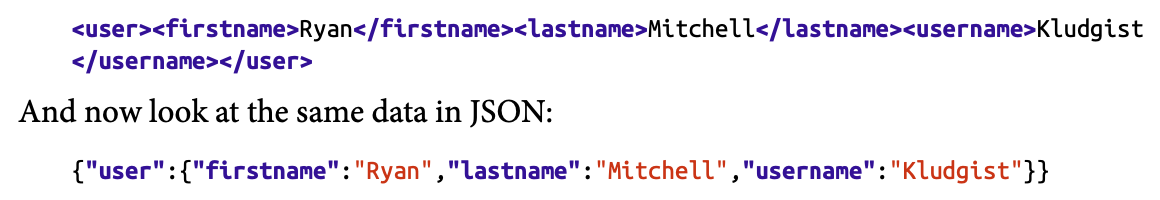  
 
 - Second due to a shift in web technologies. 

## Parsing JSON  
***  
how to parse and use this information.  
  
JSON parsing library used is part of Python’s core library.   
 - Just type in import json at the top,  
 - Python uses a more flexible approach and turns   
  - JSON objects into dictionaries,   
  - JSON arrays into lists,    
  - JSON strings into strings,

In [4]:
import json
jsonString = '{"arrayOfNums":[{"number":0},{"number":1},{"number":2}],\
"arrayOfFruits":[{"fruit":"apple"},{"fruit":"banana"},{"fruit":"pear"}]}' 

jsonObj = json.loads(jsonString)

print(jsonObj.get('arrayOfNums')) 
print(jsonObj.get('arrayOfNums')[1]) 
print(jsonObj.get('arrayOfNums')[1].get('number') +
      jsonObj.get('arrayOfNums')[2].get('number')) 
print(jsonObj.get('arrayOfFruits')[2].get('fruit'))

[{'number': 0}, {'number': 1}, {'number': 2}]
{'number': 1}
3
pear


`[{'number': 0}, {'number': 1}, {'number': 2}] ` 
 - Line 1 is a list of dictionary objects    

`{'number': 1}`
 - line 2 is a dictionary object  

`3`
 - line 3 is an integer (the sum of the integers accessed in the dictionaries)

`pear ` 
 - line 4 is a string

## Undocumented APIs  
***  
vast majority of APIs don’t have any published documentation at all.  

Traditionally whenever a user requested a page:  
 - Handle GET requests from users requesting a page of a website  
 - Retrieve the data from the database that appears on that page  
 - Format the data into the HTML template for the page  
 - Send that formatted HTML to the user

HTML creation tasks handled by the server moved into the browser  
 -  problem for web scrapers.  
  - HTML page with all of the content already in place.   
  Instead, they now got an HTML template without any content  
 - Selenium was used to solve this problem    
  - web scraper could become the browser, request the HTML template, execute any JavaScript,
  - allow all the data to load in its place, and only then scrape the page for data

 - If you scrape this page using urllib or the Requests library, you won’t find any search results.  

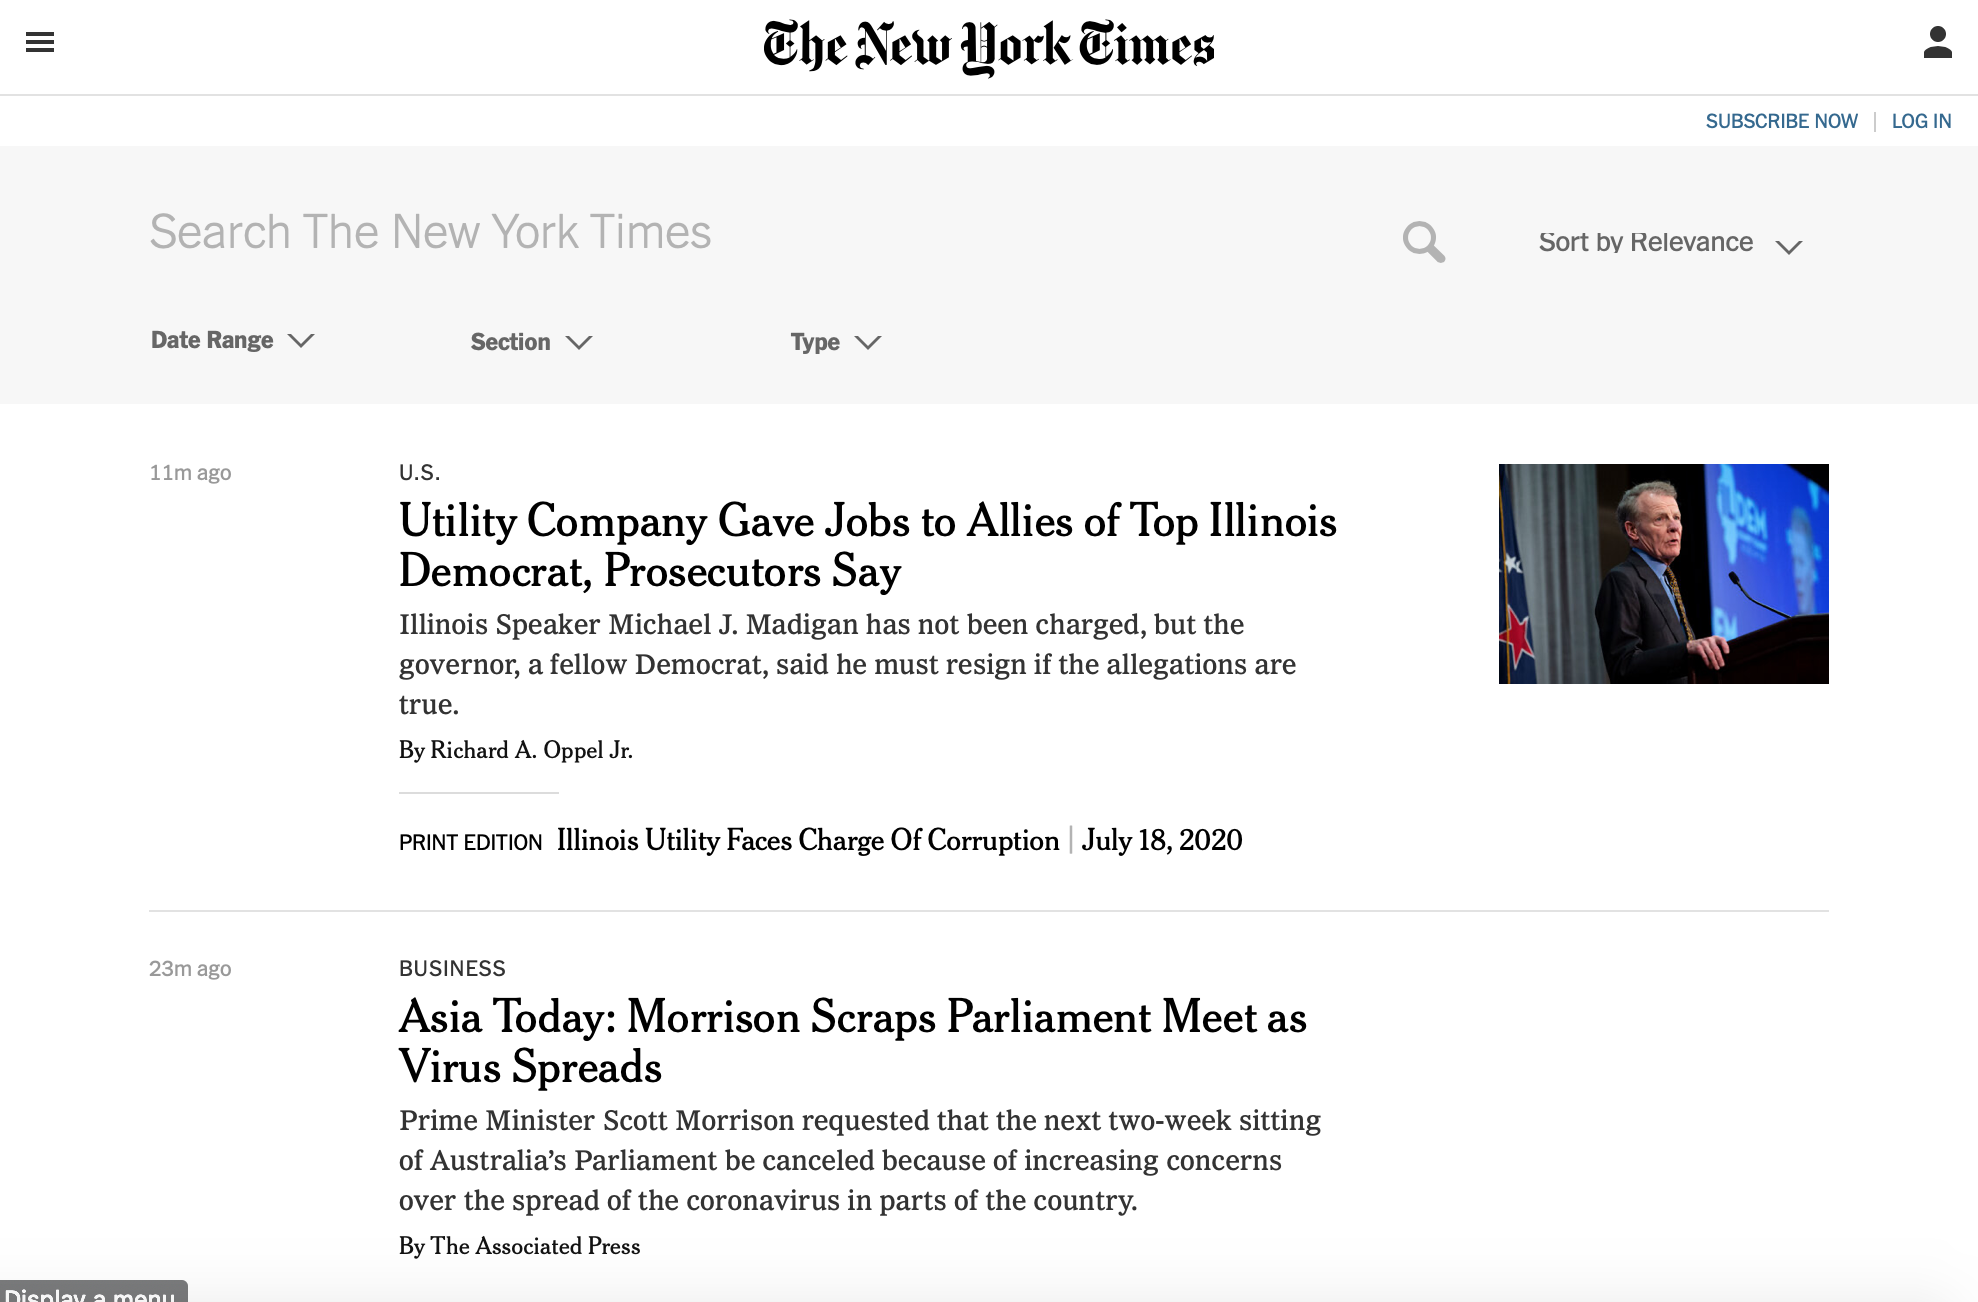

 - loaded separately via an API call:  
https://query.nytimes.com/svc/add/v1/sitesearch.json?q=python&spotlight=true&facet=true
  
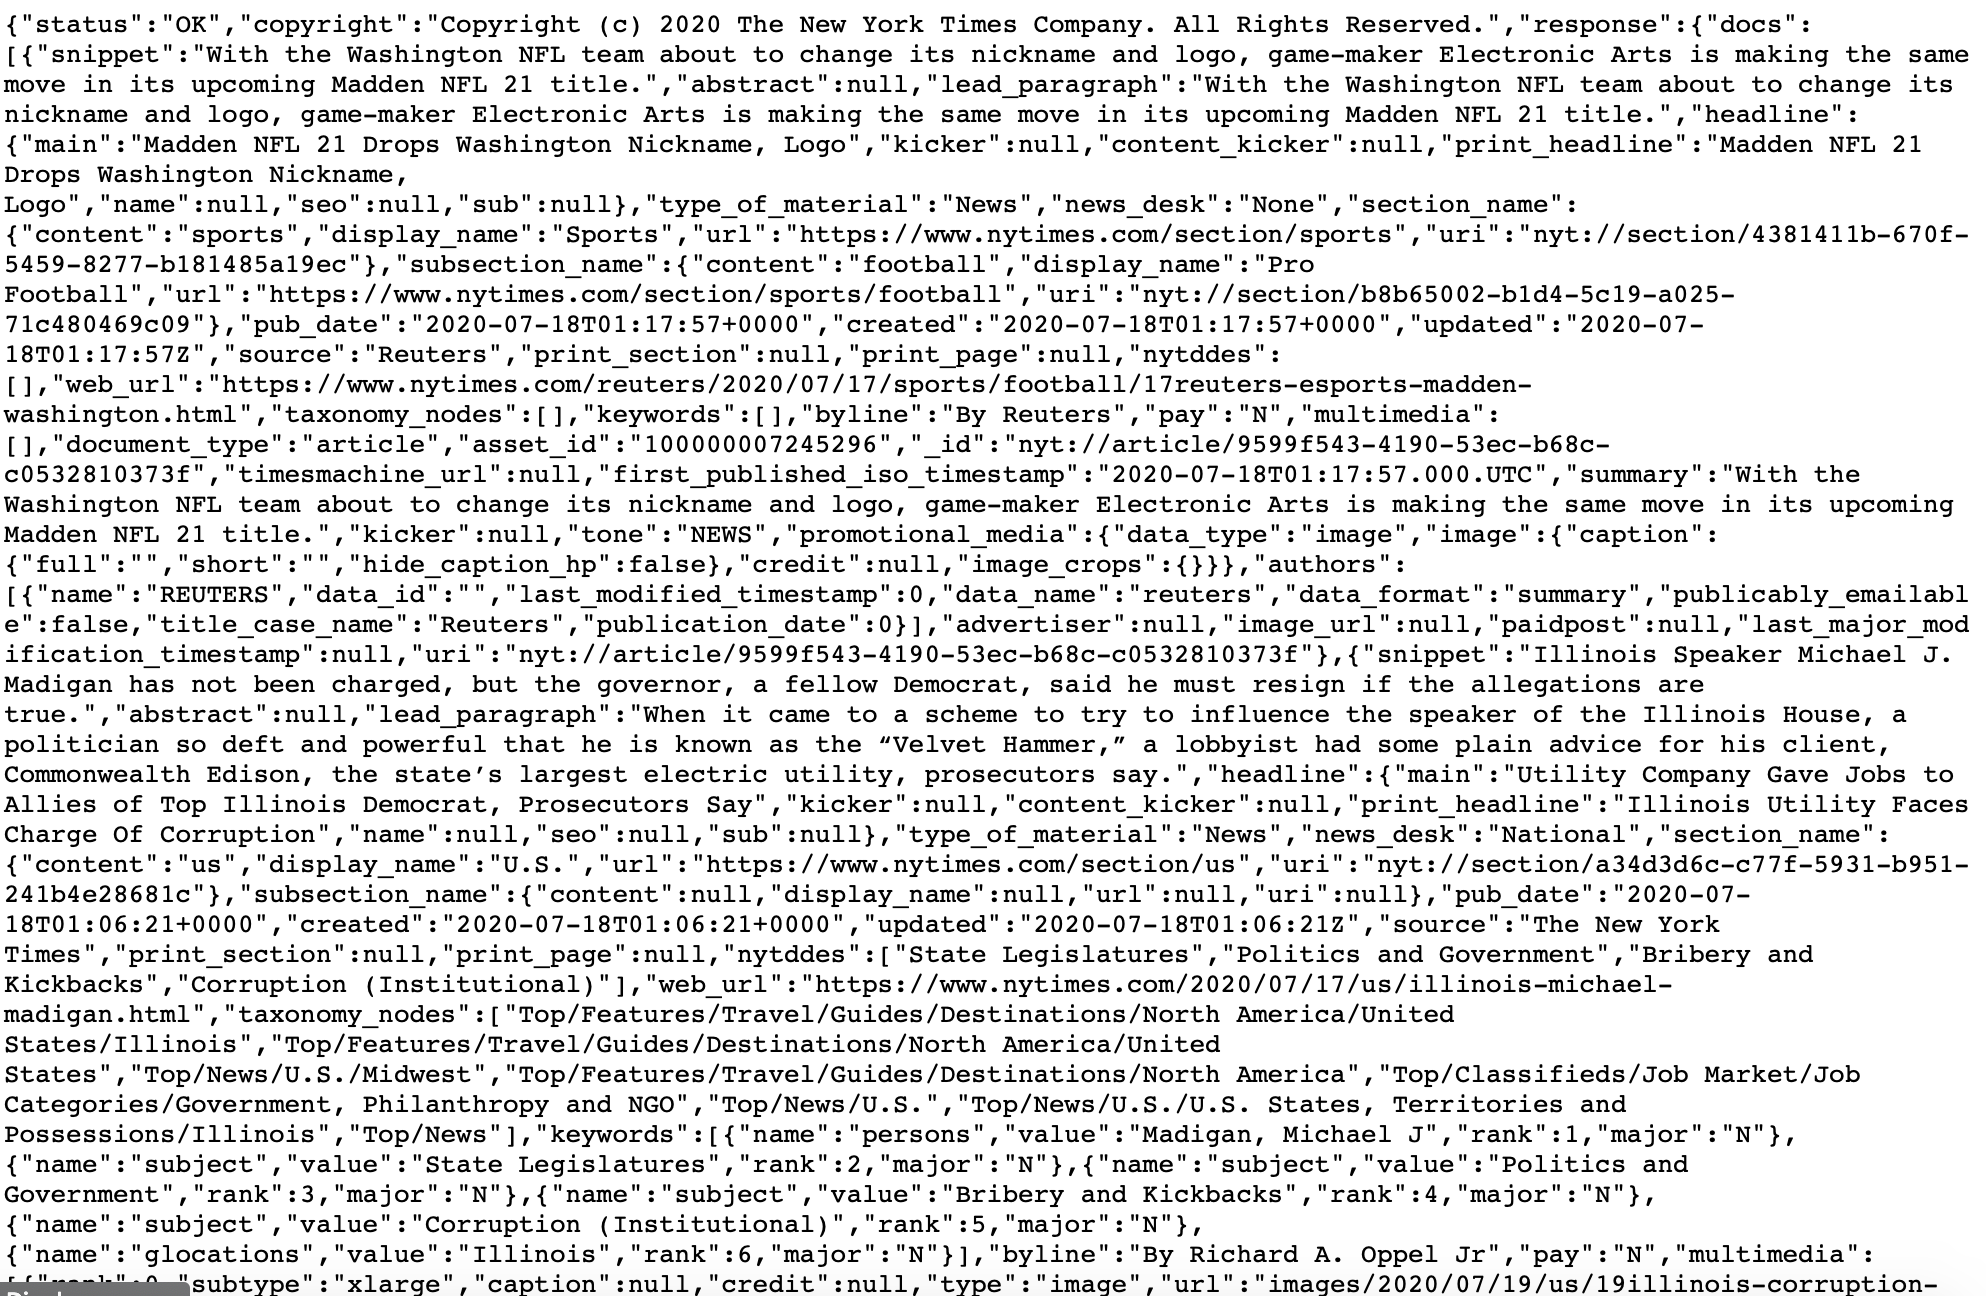

 - If you were to load this page with` Selenium`, you would be making about 100 requests and transferring 600–700 kB of data with each search.   
 - `Using the API directly`, you make only one request and transfer approximately only the 60 kb of nicely formatted data that you need.

## Finding Undocumented APIs  
***  
Chrome inspector window and click the Network tab  
 - open this window before the page loads.   

API calls tend to have several features that are useful for locating them in the list of network calls:  
 -  They often have `JSON or XML in them`. You can filter the list of requests by using the search/filter field.  
 - With GET requests, the URL will contain the parameter values passed to them.  
 - They will usually be of the `type XHR`.

## Documenting Undocumented APIs  
***  
After you’ve found an API call being made  
Every API call can be identified and documented by paying attention to the following fields:
  
HTTP method used • Inputs  
- Path parameters  
- Headers (including cookies)  
- Body content (for PUT and POST calls)  

Outputs  
- Response headers (including cookies set)  
- Response body type  
- Response body fields


## Finding and Documenting APIs Automatically  
***  
It uses Selenium, ChromeDriver, and a library called BrowserMob Proxy to load pages, crawl pages within a domain, analyze the network traffic that occurs during page load, and organize these requests into readable API calls.  
https://github.com/REMitchell/apiscraper  
  
1. Clone the apiscraper GitHub project. must contain. 

apicall.py. 
 - Contains attributes that define an API call (path, parameters, etc.) as well as logic to decide whether two API calls are the same.  
 
apiFinder.py. 
 - Main crawling class. Used by webservice.py and consoleservice.py to kick off the process of finding APIs.  
 
browser.py  
 - Has only three methods—initialize, get, and close—but encompasses rela‐ tively complicated functionality to tie together the BrowserMob Proxy server and Selenium. Scrolls through pages to ensure that the entire page is loaded, saves HTTP Archive (HAR) files to the appropriate location for processing.  

consoleservice.py  
 - Handles commands from the console and kicks off the main APIFinder class. harParser.py
Parses HAR files and extracts API calls.  

html_template.html  
 - Provides a template to display API calls in the browser.  

README.md  
 - Git readme page.  

2. Download the BrowserMob Proxy binary files from https://bmp.lightbody.net/ and
place the extracted files in the apiscraper project directory.  
3. Download ChromeDriver and place this in the apiscraper project directory.  
4. have the following Python libraries installed:    
 - tldextract  
 - selenium  
 - browsermob-proxy  

5. start collecting API calls. Typing  
     $ python consoleservice.py -h  
 
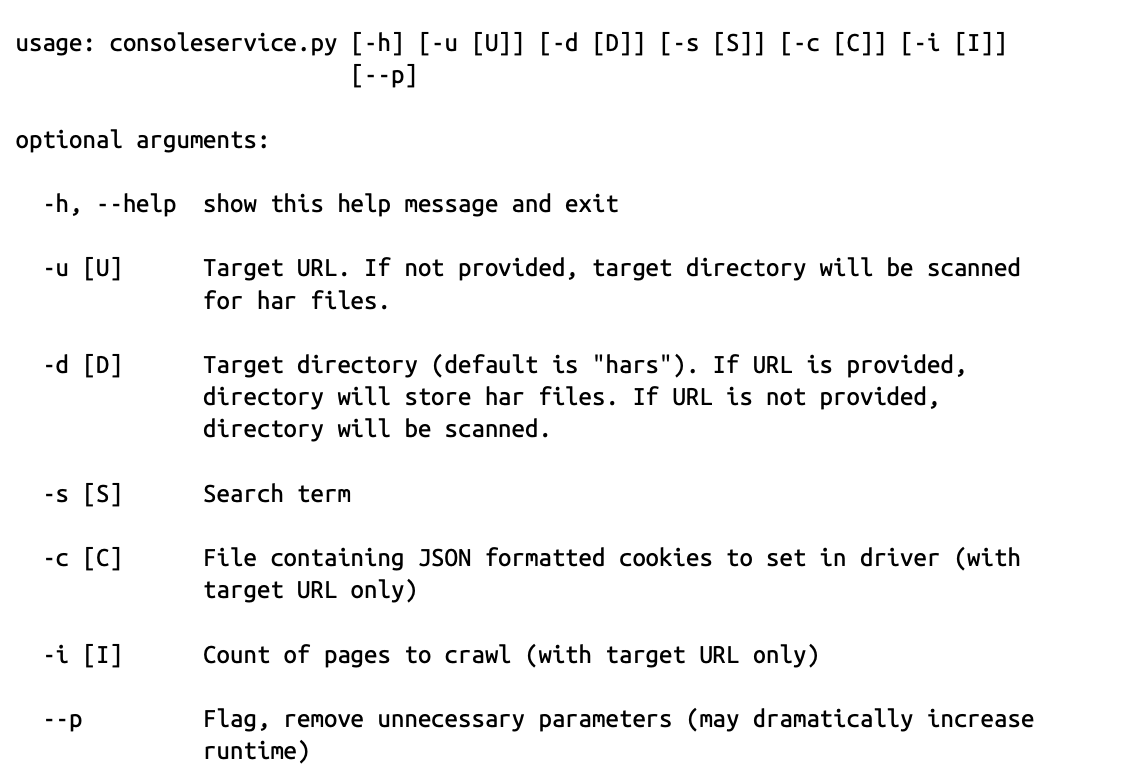

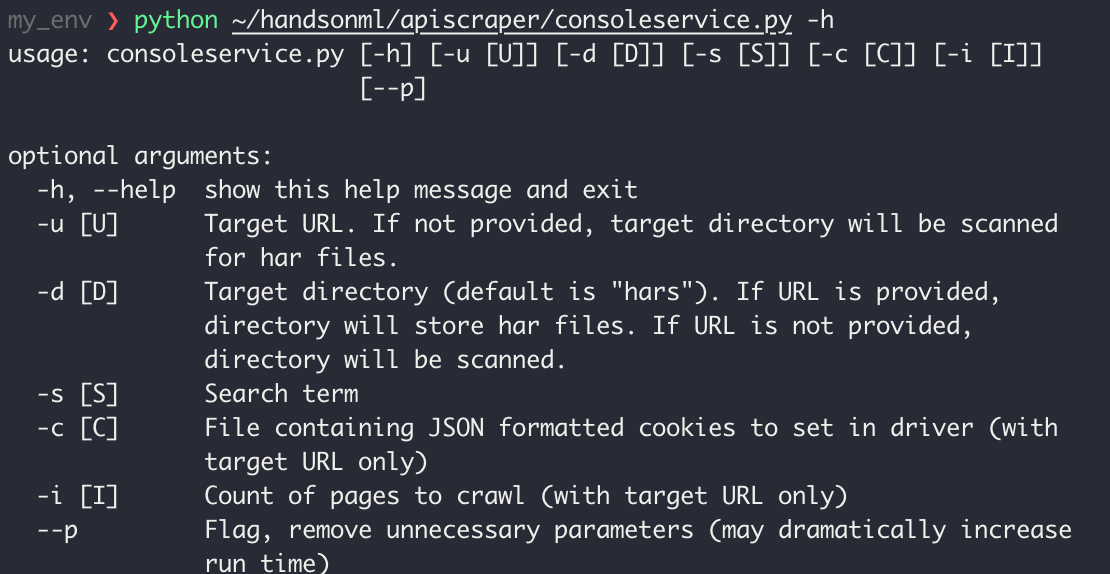  
  
 - Using the -i flag, multiple pages can be crawled  
 - All collected data is stored as a HAR file, in the default directory /har

## Combining APIs with Other Data Sources

In [5]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
import json
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    return bs.find('div', {'id':'bodyContent'}).findAll('a', 
        href=re.compile('^(/wiki/)((?!:).)*$'))

def getHistoryIPs(pageUrl):
    #Format of revision history pages is: 
    #http://en.wikipedia.org/w/index.php?title=Title_in_URL&action=history
    pageUrl = pageUrl.replace('/wiki/', '')
    historyUrl = 'http://en.wikipedia.org/w/index.php?title={}&action=history'.format(pageUrl)
    print('history url is: {}'.format(historyUrl))
    html = urlopen(historyUrl)
    bs = BeautifulSoup(html, 'html.parser')
    #finds only the links with class "mw-anonuserlink" which has IP addresses 
    #instead of usernames
    ipAddresses = bs.findAll('a', {'class':'mw-anonuserlink'})
    addressList = set()
    for ipAddress in ipAddresses:
        addressList.add(ipAddress.get_text())
    return addressList

links = getLinks('/wiki/Python_(programming_language)')

while(len(links) > 0):
    for link in links:
        print('-'*20) 
        historyIPs = getHistoryIPs(link.attrs['href'])
        for historyIP in historyIPs:
            print(historyIP)

    newLink = links[random.randint(0, len(links)-1)].attrs['href']
    links = getLinks(newLink)

--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Programming_paradigm&action=history
2409:4062:199:8335:d01:95f0:4a96:d2f6
65.19.244.125
117.221.183.123
115.114.136.130
2601:646:8782:32d3:ac4f:bc11:ad3f:3e65
66.87.149.174
144.122.238.100
154.149.30.36
2a01:c22:7602:9300:4c66:d773:1031:6aee
14.139.174.51
174.254.128.149
2405:204:6694:d402::2964:90a1
186.168.206.25
2409:4072:621c:6e63:aea6:40b6:2dc9:17d7
2601:14b:4301:19c3:9107:8bad:dbf7:5803
103.210.59.210
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Multi-paradigm_programming_language&action=history
75.139.254.117
98.197.198.46
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Functional_programming&action=history
186.168.102.119
35.137.225.220
134.204.228.36
45.20.67.14
46.142.0.228
85.138.235.57
188.150.121.15
2600:1010:b004:a4d5:424:d4bd:343:f933
188.230.187.149
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=I

2602:306:33e1:6a20:dd1b:bfab:c9bb:50a3
24.164.145.66
70.247.162.60
27.3.0.228
93.169.177.175
108.199.112.198
104.54.87.195
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=CPython&action=history
50.53.21.2
106.207.115.136
2620:104:4000:206c:94ea:36:9927:cfd4
93.182.179.223
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=PyPy&action=history
67.168.214.174
62.172.100.253
2601:647:cd01:fdf0:14af:567c:c742:334b
78.94.254.30
86.179.22.30
50.53.21.2
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Stackless_Python&action=history
78.76.40.201
173.196.139.154
2620:0:1016:19:b4f8:5e34:a59c:afa4
207.198.105.24
47.72.190.239
2601:154:c100:bcc0:8be:d7f4:72a1:4e99
137.48.251.105
137.119.92.151
86.190.223.79
77.56.53.183
73.222.188.140
93.104.118.125
93.104.114.53
2a03:7500:858:3501:8ba:7234:1e6f:8cfc
93.104.107.230
86.179.22.30
70.184.214.35
82.18.255.4
50.53.1.21
--------------------
history url is: http://e

46.175.99.212
194.66.32.10
92.176.31.25
217.205.155.130
112.198.75.119
14.1.193.179
76.174.233.82
70.184.214.35
183.82.113.143
207.207.21.81
124.107.125.60
199.18.112.253
2001:18e8:3:104e:f000::439
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=CoffeeScript&action=history
41.71.74.118
192.38.136.119
107.77.214.132
51.7.17.131
4.16.71.218
49.205.26.53
2601:640:109:6466:995c:5ad1:e5b4:a4d6
76.116.119.34
5.148.125.10
45.251.33.192
165.120.134.6
50.53.21.2
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=D_(programming_language)&action=history
172.115.81.101
153.198.45.12
2a02:168:2000:5b:2147:1cc:6d87:946c
131.243.153.167
81.6.34.172
41.114.95.59
153.196.90.204
90.33.238.137
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=F_Sharp_(programming_language)&action=history
66.150.189.1
109.98.118.192
152.3.34.56
158.174.11.253
185.33.136.86
2600:1015:b00f:9751:b52a:77ff:46bb:3f54
2800:bf0:2a5:10f8:f4e8:

112.79.199.224
112.79.208.120
93.142.95.84
2405:201:5e05:4f2d:9d5:ed5f:3ce6:c691
129.205.113.72
2405:204:1002:4fd3::23e3:80b1
2a00:23c4:f30c:c000:8967:5a97:4220:53b1
73.223.187.212
137.154.59.155
43.242.225.90
117.247.179.14
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Functional_programming&action=history
186.168.102.119
35.137.225.220
134.204.228.36
45.20.67.14
46.142.0.228
85.138.235.57
188.150.121.15
2600:1010:b004:a4d5:424:d4bd:343:f933
188.230.187.149
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Standard_library&action=history
141.154.111.35
129.10.9.119
68.200.191.240
118.6.165.80
5.214.154.144
24.4.198.207
106.209.197.239
73.166.146.160
147.188.194.245
189.72.121.146
193.196.8.103
75.139.254.117
37.11.42.79
--------------------
history url is: http://en.wikipedia.org/w/index.php?title=ABC_(programming_language)&action=history
117.195.212.149
24.218.155.160
113.162.145.67
72.188.68.228
14.1.193.137
24.91.6.95
67

KeyboardInterrupt: 

In [6]:
def getCountry(ipAddress):
    try:
        response = urlopen(
            'http://freegeoip.net/json/{}'.format(ipAddress)).read().decode('utf-8')
    except HTTPError:
        return None
    responseJson = json.loads(response)
    return responseJson.get('country_code')
    
links = getLinks('/wiki/Python_(programming_language)')

while(len(links) > 0):
    for link in links:
        print('-'*20) 
        historyIPs = getHistoryIPs(link.attrs["href"])
        for historyIP in historyIPs:
            country = getCountry(historyIP)
            if country is not None:
                print('{} is from {}'.format(historyIP, country))

    newLink = links[random.randint(0, len(links)-1)].attrs['href']
    links = getLinks(newLink)

--------------------
history url is: http://en.wikipedia.org/w/index.php?title=Programming_paradigm&action=history


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

 If you’re looking to build APIs instead of just using them, or if you want to learn more about the theory of their construction and syntax,   
 - recommend RESTful Web APIs by Leonard Richardson, Mike Amundsen, and Sam Ruby (O’Reilly).   
 - Designing APIs for the Web (O’Reilly), that teaches you how to create your own APIs